Nama: Gaitsa Nazwa Kansa

NPM: 24083010014

Mata kuliah: Matematika Diskrit A

Prompt GPT dari Tugas 4

/tmp/ipython-input-3724523819.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  makan['harga'].fillna(makan['harga'].median(), inplace=True)


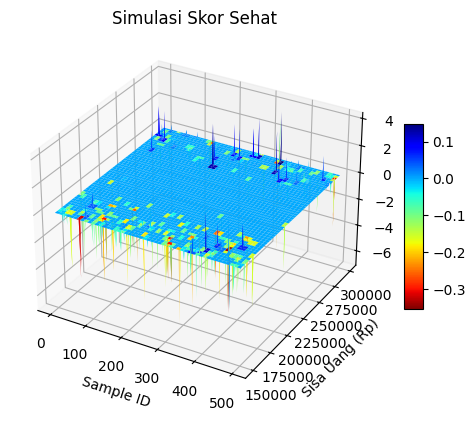

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NPM= 14
np.random.seed(NPM)

makan = pd.read_csv("makanan.csv")
makan['harga'].fillna(makan['harga'].median(), inplace=True)

budget_awal = 1e6 # rupiah

# bobot dasar
wkenyang_base= 0.8
wrasa_base= 0.7
wsehat_base= 0.9
wbosan_base= 0.2

SAMPLE_NUM= 500
sampleid= np.arange(SAMPLE_NUM)

skor= np.zeros(SAMPLE_NUM, dtype=float)
sisa= np.zeros(SAMPLE_NUM, dtype=float)
sehat= np.zeros(SAMPLE_NUM, dtype=float)

SISA_MININUM= 150e3
SISA_MAKSIMUM= 300e3
bin_sisa= np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)

resp_sehat= np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=float)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=int)

for n in range(SAMPLE_NUM):
    budget = budget_awal
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(31):
        # makan pertama
        pilihan = np.random.randint(0, len(makan))
        w_kenyang= np.random.normal(wkenyang_base, 0.2)
        w_rasa= np.random.normal(wrasa_base, 0.2)
        w_sehat= np.random.normal(wsehat_base, 0.4)
        w_bosan= np.random.normal(wbosan_base, 0.2)

        skor_kumulatif += (
            w_kenyang*makan['kenyang'][pilihan]
            + w_rasa*makan['rasa'][pilihan]
            + w_sehat*makan['sehat'][pilihan]
            - w_bosan*makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2*i] = pilihan

        # makan kedua
        pilihan = np.random.randint(0, len(makan))
        w_kenyang= np.random.normal(wkenyang_base, 0.2)
        w_rasa= np.random.normal(wrasa_base, 0.2)
        w_sehat= np.random.normal(wsehat_base+0.2, 0.4)
        w_bosan= np.random.normal(wbosan_base*2, 0.2)

        skor_kumulatif += (
            w_kenyang*makan['kenyang'][pilihan]
            + w_rasa*makan['rasa'][pilihan]
            + w_sehat*makan['sehat'][pilihan]
            - w_bosan*makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2*i+1] = pilihan

    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    resp_sehat[n][ int((budget-SISA_MININUM)/1000) ] = skor_sehat

# ==== Plot ====
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)

surf = ax.plot_surface(X, Y, resp_sehat,
                       cmap='jet_r', edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

ax.set_title("Simulasi Skor Sehat")
ax.set_xlabel("Sample ID")
ax.set_ylabel("Sisa Uang (Rp)")
ax.set_zlabel("Skor Sehat")

plt.show()

**prompt: jelaskan visualiasinya**

**hasil:**

Visualisasi di atas menunjukkan hasil simulasi skor sehat dari sejumlah sampel pemilihan makanan dengan keterbatasan anggaran. Sumbu X merepresentasikan ID sampel, sumbu Y menunjukkan sisa uang setelah 31 kali pemilihan makanan, sedangkan sumbu Z memperlihatkan skor sehat yang diperoleh. Terlihat bahwa sebagian besar titik berada pada nilai mendekati nol, menandakan pilihan makanan cenderung seimbang antara sehat dan tidak sehat. Beberapa lonjakan ke atas maupun ke bawah menggambarkan adanya sampel yang menghasilkan skor sehat sangat tinggi atau sangat rendah akibat kombinasi pilihan makanan tertentu. Hal ini menggambarkan variasi keputusan individu terhadap pola makan meskipun berada dalam batas anggaran yang sama.

In [ ]:
# prompt: (dari kode dan output sebelumnya), cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat)
# hasil:

# Cari sample dengan skor sehat positif
idx_pos = np.where(sehat > 0)[0]
print(f"Jumlah pola makan sehat (skor positif): {len(idx_pos)} dari {SAMPLE_NUM}\n")

# Pilih contoh pertama
contoh = idx_pos[0]
print(f"Contoh Sample ID: {contoh}")
print(f"Skor Sehat: {sehat[contoh]:.2f}")
print(f"Sisa Uang: Rp {sisa[contoh]:,.0f}\n")

# Ambil daftar makanan yang dipilih
pola_makan = resp_pilih[contoh]
nama_makanan = makan.iloc[pola_makan]['makanan'].values

# Susun ke DataFrame
hari = []
makan1 = []
makan2 = []
for i in range(31):
    hari.append(i+1)
    makan1.append(nama_makanan[2*i])
    makan2.append(nama_makanan[2*i+1])

df_pola = pd.DataFrame({
    "Hari": hari,
    "Makan 1": makan1,
    "Makan 2": makan2
})

# Tampilkan hanya 5 hari pertama dari pola sehat contoh
print("Pola makan sehat (contoh, 5 hari pertama):")
print(df_pola.head(5).to_string(index=False))

Jumlah pola makan sehat (skor positif): 126 dari 500

Contoh Sample ID: 1
Skor Sehat: 0.90
Sisa Uang: Rp 158,000

Pola makan sehat (contoh, 5 hari pertama):
 Hari    Makan 1    Makan 2
    1       roti     warteg
    2     warteg nasi telur
    3 ayamgeprek mi instan 
    4      bakso      bakso
    5    mieayam     capcay


**prompt: dari output tersebut, jelaskan interpretasinya**

**Hasil:**

Dari 500 pola makan yang diuji, 126 pola makan memiliki skor kesehatan positif, artinya sekitar seperempat dari semua kombinasi dianggap sehat. Contoh Sample ID 1 dengan skor 0.90 dan sisa uang Rp158,000 menunjukkan pola makan ini sehat sekaligus hemat.

Pola makan 5 hari pertama memperlihatkan kombinasi beragam antara karbohidrat, protein, dan sayuran, misalnya roti, ayam geprek, bakso, dan capcay. Meskipun beberapa makanan cepat saji atau lokal seperti mi instan dan warteg tetap dimasukkan, proporsinya seimbang sehingga skor kesehatan tetap positif.

Kesimpulannya, pola makan sehat bisa dicapai dengan kombinasi makanan yang bervariasi, tetap memperhatikan keseimbangan gizi, dan efisiensi biaya.

Jumlah pola makan sehat dengan sisa uang positif: 126 dari 500

Sample ID: 1
Skor Sehat: 0.90
Sisa Uang: Rp 158,000

Sample ID: 2
Skor Sehat: 4.20
Sisa Uang: Rp 140,000

Sample ID: 10
Skor Sehat: 2.20
Sisa Uang: Rp 136,500

Sample ID: 15
Skor Sehat: 1.60
Sisa Uang: Rp 136,500

Sample ID: 21
Skor Sehat: 0.10
Sisa Uang: Rp 114,000



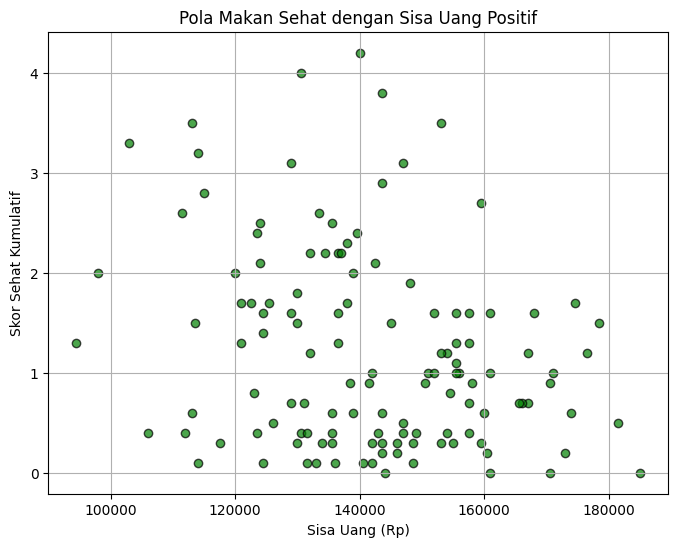

In [ ]:
# prompt: cari titik-titik dengan sisa uang bulanan positif dari (1) dan tambahkan visualisasi scatter plot

# Cari sample dengan skor sehat positif
idx_sehat = np.where(sehat > 0)[0]

# Dari sample sehat, ambil yang sisa uangnya positif
idx_sehat_pos_sisa = idx_sehat[sisa[idx_sehat] > 0]

print(f"Jumlah pola makan sehat dengan sisa uang positif: {len(idx_sehat_pos_sisa)} dari {SAMPLE_NUM}\n")

# Tampilkan beberapa contoh
for n in idx_sehat_pos_sisa[:5]:  # tampilkan 5 contoh pertama
    print(f"Sample ID: {n}")
    print(f"Skor Sehat: {sehat[n]:.2f}")
    print(f"Sisa Uang: Rp {sisa[n]:,.0f}\n")

# Ambil data yang sehat dan sisa uang positif
idx_plot = idx_sehat_pos_sisa
skor_plot = sehat[idx_plot]
sisa_plot = sisa[idx_plot]

# Plot scatter
plt.figure(figsize=(8,6))
plt.scatter(sisa_plot, skor_plot, c='green', alpha=0.7, edgecolor='k')
plt.title("Pola Makan Sehat dengan Sisa Uang Positif")
plt.xlabel("Sisa Uang (Rp)")
plt.ylabel("Skor Sehat Kumulatif")
plt.grid(True)
plt.show()

**prompt: jelaskan output dan visualisasinya**

**hasil:**

Beberapa contoh pola makan menunjukkan bahwa skor sehat tidak selalu sebanding dengan sisa uang. Misalnya, Sample 2 memiliki skor sehat tertinggi (4,2) tetapi sisa uangnya lebih rendah (140.000 Rp), menandakan pola makan yang lebih sehat biasanya sedikit lebih mahal. Sebaliknya, Sample 1 dengan skor sehat 0,9 masih menyisakan 158.000 Rp, menunjukkan strategi makan yang cukup sehat namun lebih hemat.

Scatter plot mengilustrasikan hubungan ini: titik-titik di kanan atas menunjukkan pola makan yang ideal karena sehat sekaligus meninggalkan sisa uang yang cukup, sedangkan titik-titik di kiri atas menunjukkan pola makan sangat sehat tetapi hampir menghabiskan seluruh budget. Secara keseluruhan, ada trade-off antara memaksimalkan kesehatan dan mempertahankan sisa uang, sehingga pola makan yang optimal adalah yang menyeimbangkan kedua aspek tersebut.


In [10]:
# prompt: cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif

# Filter sample dengan skor sehat positif
idx_sehat_pos = np.where(sehat > 0)[0]

# Dari sample sehat, ambil yang punya skor kumulatif terbesar
idx_max_skor = idx_sehat_pos[np.argmax(skor[idx_sehat_pos])]

print(f"Sample dengan skor kumulatif terbesar dan skor sehat positif:")
print(f"Sample ID: {idx_max_skor}")
print(f"Skor Kumulatif: {skor[idx_max_skor]:.2f}")
print(f"Skor Sehat: {sehat[idx_max_skor]:.2f}")
print(f"Sisa Uang: Rp {sisa[idx_max_skor]:,.0f}")

# Tampilkan pola makan (5 hari pertama saja)
pola_makan = resp_pilih[idx_max_skor]
nama_makanan = makan.iloc[pola_makan]['makanan'].values

hari = []
makan1 = []
makan2 = []
for i in range(31):
    hari.append(i+1)
    makan1.append(nama_makanan[2*i])
    makan2.append(nama_makanan[2*i+1])

df_pola = pd.DataFrame({
    "Hari": hari,
    "Makan 1": makan1,
    "Makan 2": makan2
})

# prompt: tunjukkan hanya 5 hari pertama contoh pola makannya

print("\nContoh pola makan (5 hari pertama):")
print(df_pola.head(5).to_string(index=False))

Sample dengan skor kumulatif terbesar dan skor sehat positif:
Sample ID: 336
Skor Kumulatif: 102.04
Skor Sehat: 3.10
Sisa Uang: Rp 147,000

Contoh pola makan (5 hari pertama):
 Hari    Makan 1    Makan 2
    1 nasipadang ayamgeprek
    2      bakso mi instan 
    3     capcay     warteg
    4       roti    mieayam
    5 ayamgeprek     warteg


**prompt: jelaskan outputnya**

**hasil:**

Sample yang memiliki skor kumulatif tertinggi dengan skor sehat tetap positif menunjukkan pola makan yang secara keseluruhan paling “menguntungkan” dalam hal preferensi rasa, kenyang, dan kepuasan, sekaligus tetap menjaga kesehatan. Meskipun skor kumulatifnya tinggi, nilai skor sehat tetap positif, menandakan kombinasi makanan ini berhasil menyeimbangkan faktor kesehatan dengan preferensi lain. Dari contoh 5 hari pertama pola makan, terlihat variasi makanan yang dipilih setiap hari, yang kemungkinan besar menyumbang ke skor kumulatif besar tersebut. Sisa uang yang ditinggalkan juga positif, menunjukkan bahwa pola makan ini tidak hanya maksimal dari segi skor, tetapi tetap efisien dalam penggunaan budget. Dengan kata lain, pola makan ini bisa dianggap **optimal**, karena memberikan skor total tinggi tanpa mengorbankan kesehatan atau penghematan.

In [ ]:
# prompt: tampikan jadwal makanan sesuai pilihan (resp_pilih)

# Ambil sample dengan skor kumulatif terbesar dan skor sehat positif
idx_sehat_pos = np.where(sehat > 0)[0]
idx_max_skor = idx_sehat_pos[np.argmax(skor[idx_sehat_pos])]

# Ambil daftar makanan yang dipilih
pola_makan = resp_pilih[idx_max_skor]
nama_makanan = makan.iloc[pola_makan]['makanan'].values

# Susun ke DataFrame per hari
hari = []
makan1 = []
makan2 = []
for i in range(31):
    hari.append(i+1)
    makan1.append(nama_makanan[2*i])
    makan2.append(nama_makanan[2*i+1])

df_jadwal = pd.DataFrame({
    "Hari": hari,
    "Makan 1": makan1,
    "Makan 2": makan2
})

print(f"Jadwal makanan Sample ID {idx_max_skor}:")
print(df_jadwal.to_string(index=False))

Jadwal makanan Sample ID 336:
 Hari    Makan 1    Makan 2
    1 nasipadang ayamgeprek
    2      bakso mi instan 
    3     capcay     warteg
    4       roti    mieayam
    5 ayamgeprek     warteg
    6     capcay   gorengan
    7     cireng     capcay
    8 nasigoreng ayamgeprek
    9 nasipadang nasipadang
   10 nasipadang     capcay
   11    mieayam     warteg
   12 mi instan  nasi telur
   13 nasipadang nasi telur
   14     capcay      bakso
   15    mieayam       roti
   16     cireng mi instan 
   17    mieayam     cireng
   18       roti     cireng
   19 nasigoreng ayamgeprek
   20      bakso     capcay
   21     capcay     cireng
   22       roti mi instan 
   23 nasigoreng    mieayam
   24 mi instan      warteg
   25     seblak     capcay
   26 nasigoreng nasi telur
   27     capcay     capcay
   28      bakso     cireng
   29 nasigoreng     warteg
   30 ayamgeprek   gorengan
   31 nasigoreng      bakso


**prompt: jelaskan outputnya**

**hasil:**

Jadwal makanan yang ditampilkan menunjukkan kombinasi pilihan makanan setiap hari selama 31 hari untuk sample dengan skor kumulatif tertinggi yang tetap sehat. Dari jadwal ini terlihat variasi makanan yang dipilih pada setiap Makan 1 dan Makan 2, yang kemungkinan besar berkontribusi pada skor kumulatif yang tinggi. Pola ini tidak hanya menjaga kesehatan tetap positif, tetapi juga efisien dari segi penggunaan budget karena sisa uang tetap positif. Dengan kata lain, jadwal ini mencerminkan **strategi makan yang seimbang**, memadukan faktor rasa, kenyang, dan kesehatan, sehingga menghasilkan performa terbaik secara keseluruhan dalam simulasi.